# Decision Tree

Given Logistic Regression does not work well with our dataset, let's try to use Decision Tree instead.

Decision Tree often work well with non-linear imbalanced dataset

For recap, the threshold predictor result :
```
Threshold Predictor 

Train Data Metrics:
F2 Score on Training Data: 0.7860593624973135
Recall on Training Data: 0.9062363163082587
Precision on Training Data: 0.6459185428659584
Accuracy on Training Data: 0.92275
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.8053615831757778
Recall on Test Data: 0.9280162842339008
Precision on Test Data: 0.6571438277056866
Accuracy on Test Data: 0.9275
```

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

y_train_omf = y_train['Machine failure']
y_test_omf = y_test['Machine failure']
y_train_over_omf = pd.read_csv('y_oversample_train.csv')
X_train_over_omf = pd.read_csv('X_oversample_train.csv')

X_train_reduced = X_train.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
X_test_reduced = X_test.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
X_train_over_reduced = X_train_over_omf.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
print("Oversampling done. Shape of oversampled training set:", X_train_over_omf.shape)
print("Oversampling done. Shape of oversampled training labels:", y_train_over_omf.shape)

Oversampling done. Shape of oversampled training set: (15444, 9)
Oversampling done. Shape of oversampled training labels: (15444, 1)


In [21]:
from sklearn.metrics import classification_report, fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def analyze_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    y_train_omf = y_train['Machine failure']
    y_test_omf = y_test['Machine failure']
    clf.fit(X_train, y_train_omf)
    y_train_pred_omf = clf.predict(X_train)
    y_test_pred_omf = clf.predict(X_test)
    f2_train=fbeta_score(y_train_omf, y_train_pred_omf, beta=2, average='macro')
    f2_test=fbeta_score(y_test_omf, y_test_pred_omf, beta=2, average='macro')
    train_recall=recall_score(y_train_omf, y_train_pred_omf, average='macro')
    test_recall=recall_score(y_test_omf, y_test_pred_omf, average='macro')
    train_precision=precision_score(y_train_omf, y_train_pred_omf, average='macro', zero_division=0)
    test_precision=precision_score(y_test_omf, y_test_pred_omf, average='macro', zero_division=0)
    train_accuracy=accuracy_score(y_train_omf, y_train_pred_omf)
    test_accuracy=accuracy_score(y_test_omf, y_test_pred_omf)
    predictor_name = clf.__class__.__name__


    plt.figure(figsize=(15, 5))
    cm = confusion_matrix(y_train_omf, y_train_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 1))
    plt.title(f'{predictor_name} on Train Data')
    cm = confusion_matrix(y_test_omf, y_test_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
    plt.title(f'{predictor_name} on Test Data')
    plt.show()


    print(predictor_name)
    print(" For `Machine failure` label:")
    print("--------------------------------------------------")
    print("Train Data Metrics:")
    print(f"F2 Score on Training Data: {f2_train}")
    print(f"Recall on Training Data: {train_recall}")
    print(f"Precision on Training Data: {train_precision}")
    print(f"Accuracy on Training Data: {train_accuracy}")
    print("--------------------------------------------------")
    print("Test Data Metrics:")
    print(f"F2 Score on Test Data: {f2_test}")
    print(f"Recall on Test Data: {test_recall}")
    print(f"Precision on Test Data: {test_precision}")
    print(f"Accuracy on Test Data: {test_accuracy}")


## DecisionTree On Imbalanced Data

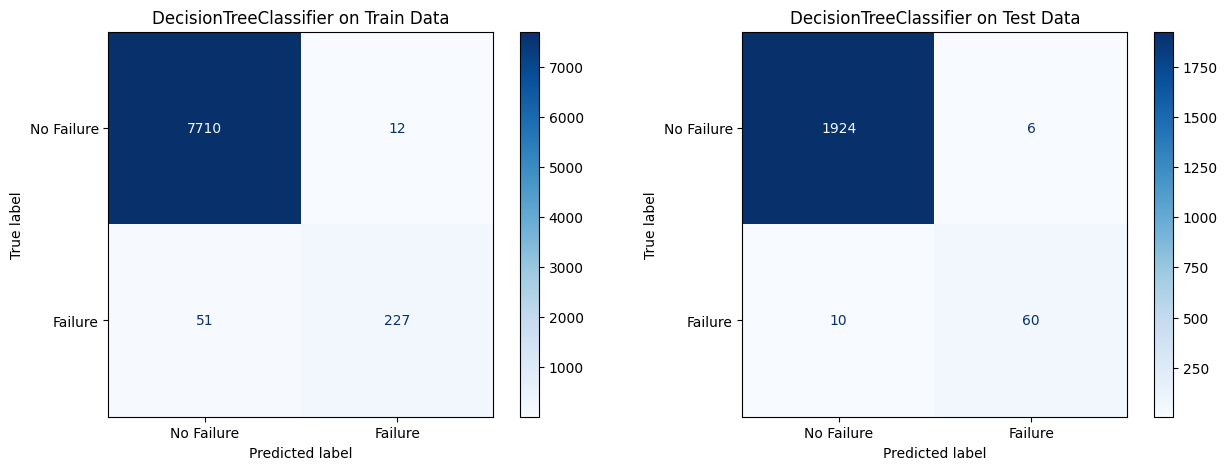

DecisionTreeClassifier
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.9187784578084845
Recall on Training Data: 0.9074963805179632
Precision on Training Data: 0.9716097384249862
Accuracy on Training Data: 0.992125
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.9317650834479942
Recall on Test Data: 0.9270170244263508
Precision on Test Data: 0.9519601391369747
Accuracy on Test Data: 0.992


In [22]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
analyze_model_performance(cdt, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.7860593624973135
- F2 Score on Test Data: 0.8053615831757778
- Accuracy on Training Data: 0.92275
- Accuracy on Test Data: 0.9275

LogisticRegression:
- F2 Score on Training Data: 0.642806888238361
- F2 Score on Test Data: 0.6119487264330775
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

DecisionTreeClassifier
- F2 Score on Training Data: 0.9187784578084845
- F2 Score on Test Data: 0.9317650834479942
- Accuracy on Training Data: 0.992125
- Accuracy on Test Data: 0.992

Decision Tree performed so much better than logistic regression.

Decision Tree also performed better than Threshold Predictor.

## Logistic Regression on Balanced Data


Let's see if using balanced dataset will improved our F2 and accuracy

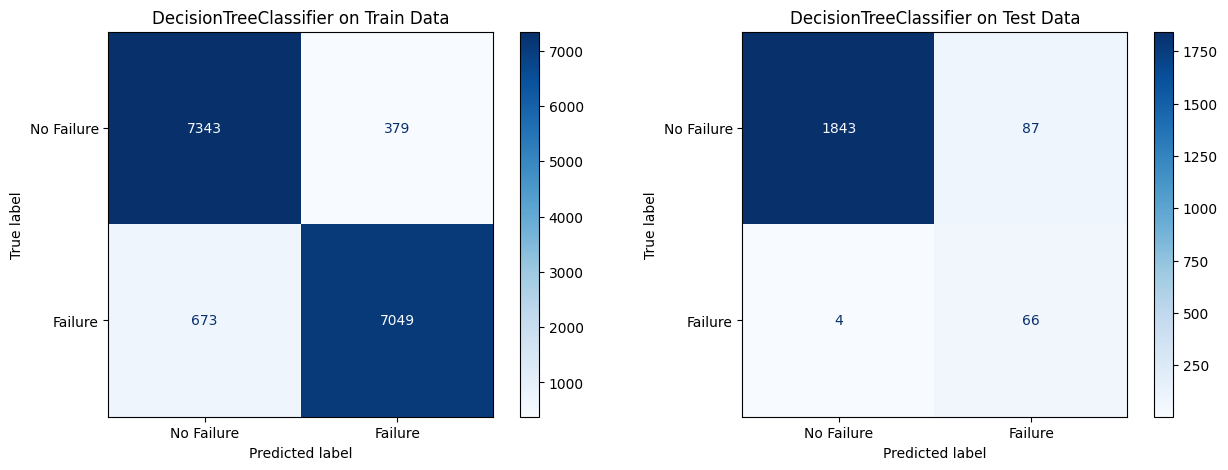

DecisionTreeClassifier
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.931792003656209
Recall on Training Data: 0.9318829318829319
Precision on Training Data: 0.9325098792721505
Accuracy on Training Data: 0.9318829318829319
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.8626657841101689
Recall on Test Data: 0.9488897113249445
Precision on Test Data: 0.7146034374767773
Accuracy on Test Data: 0.9545


In [23]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
analyze_model_performance(cdt, X_train=X_train_over_omf, y_train=y_train_over_omf, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.7860593624973135
- F2 Score on Test Data: 0.8053615831757778
- Accuracy on Training Data: 0.92275
- Accuracy on Test Data: 0.9275

DecisionTreeClassifier
- F2 Score on Training Data: 0.931792003656209
- F2 Score on Test Data: 0.8626657841101689
- Accuracy on Training Data: 0.9318829318829319
- Accuracy on Test Data: 0.9545

Using balanced dataset where we have more failure data, 

Decision Tree classifier performed very well and improved compared to Threshold Predictor

In [24]:
cdt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

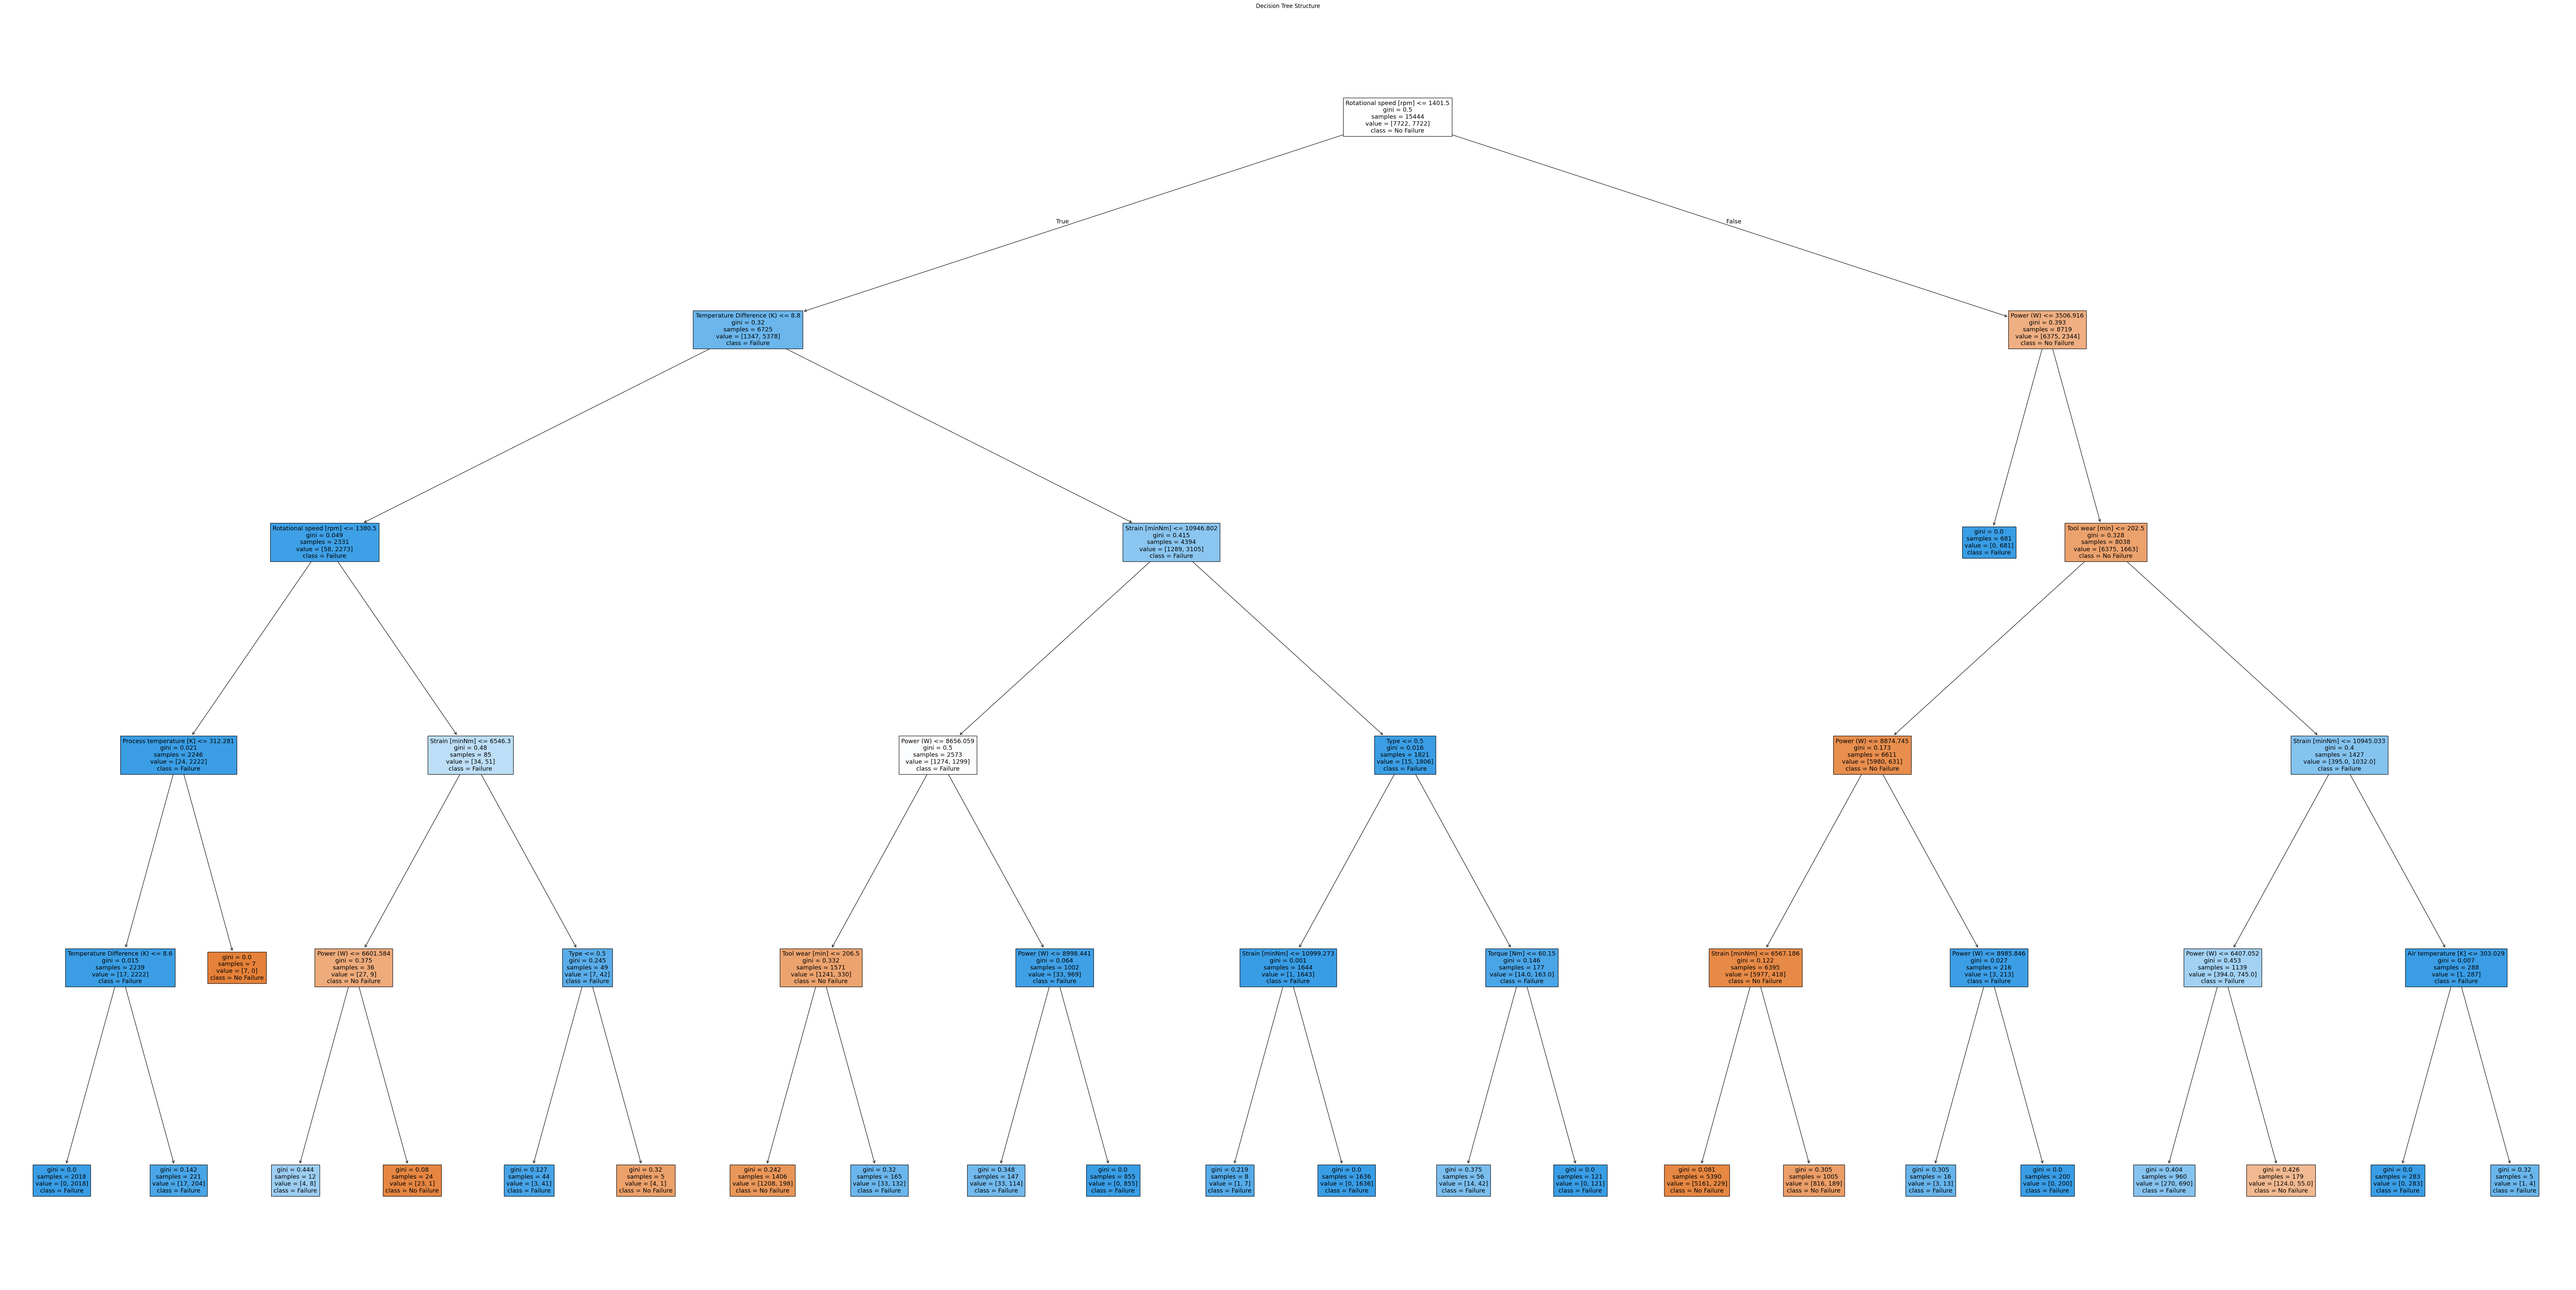

In [25]:
from sklearn import tree
plt.figure(figsize=(100, 50))
tree.plot_tree(cdt, filled=True, feature_names=X_train.columns, class_names=['No Failure', 'Failure'])
plt.title('Decision Tree Structure')
plt.show()

## Logistic Regression on Reduced Features


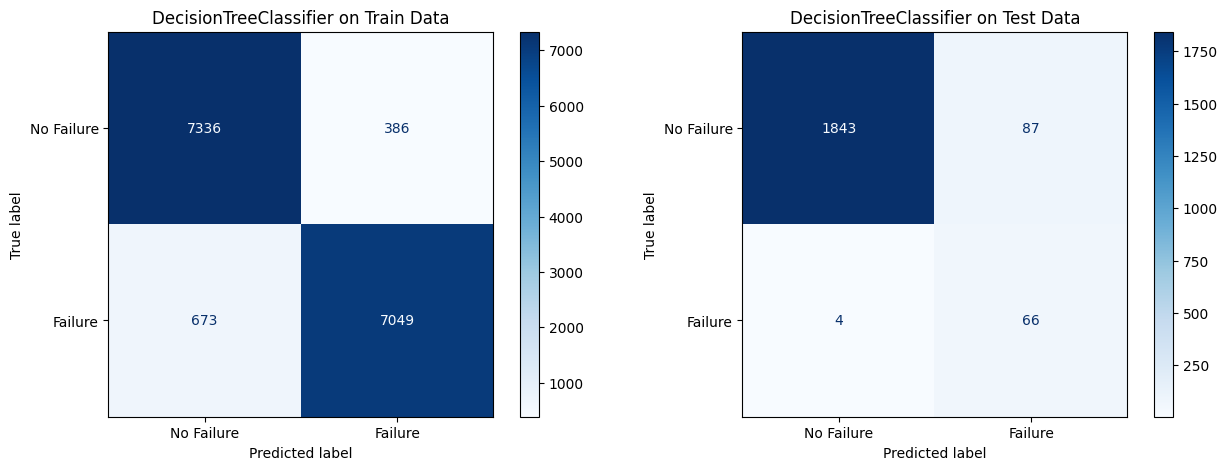

DecisionTreeClassifier
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.931343006763002
Recall on Training Data: 0.9314296814296814
Precision on Training Data: 0.9320264618242607
Accuracy on Training Data: 0.9314296814296814
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.8626657841101689
Recall on Test Data: 0.9488897113249445
Precision on Test Data: 0.7146034374767773
Accuracy on Test Data: 0.9545


In [26]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
analyze_model_performance(cdt, X_train=X_train_over_reduced, y_train=y_train_over_omf, X_test=X_test_reduced, y_test=y_test)

Nothing seemed to change compared to using full features


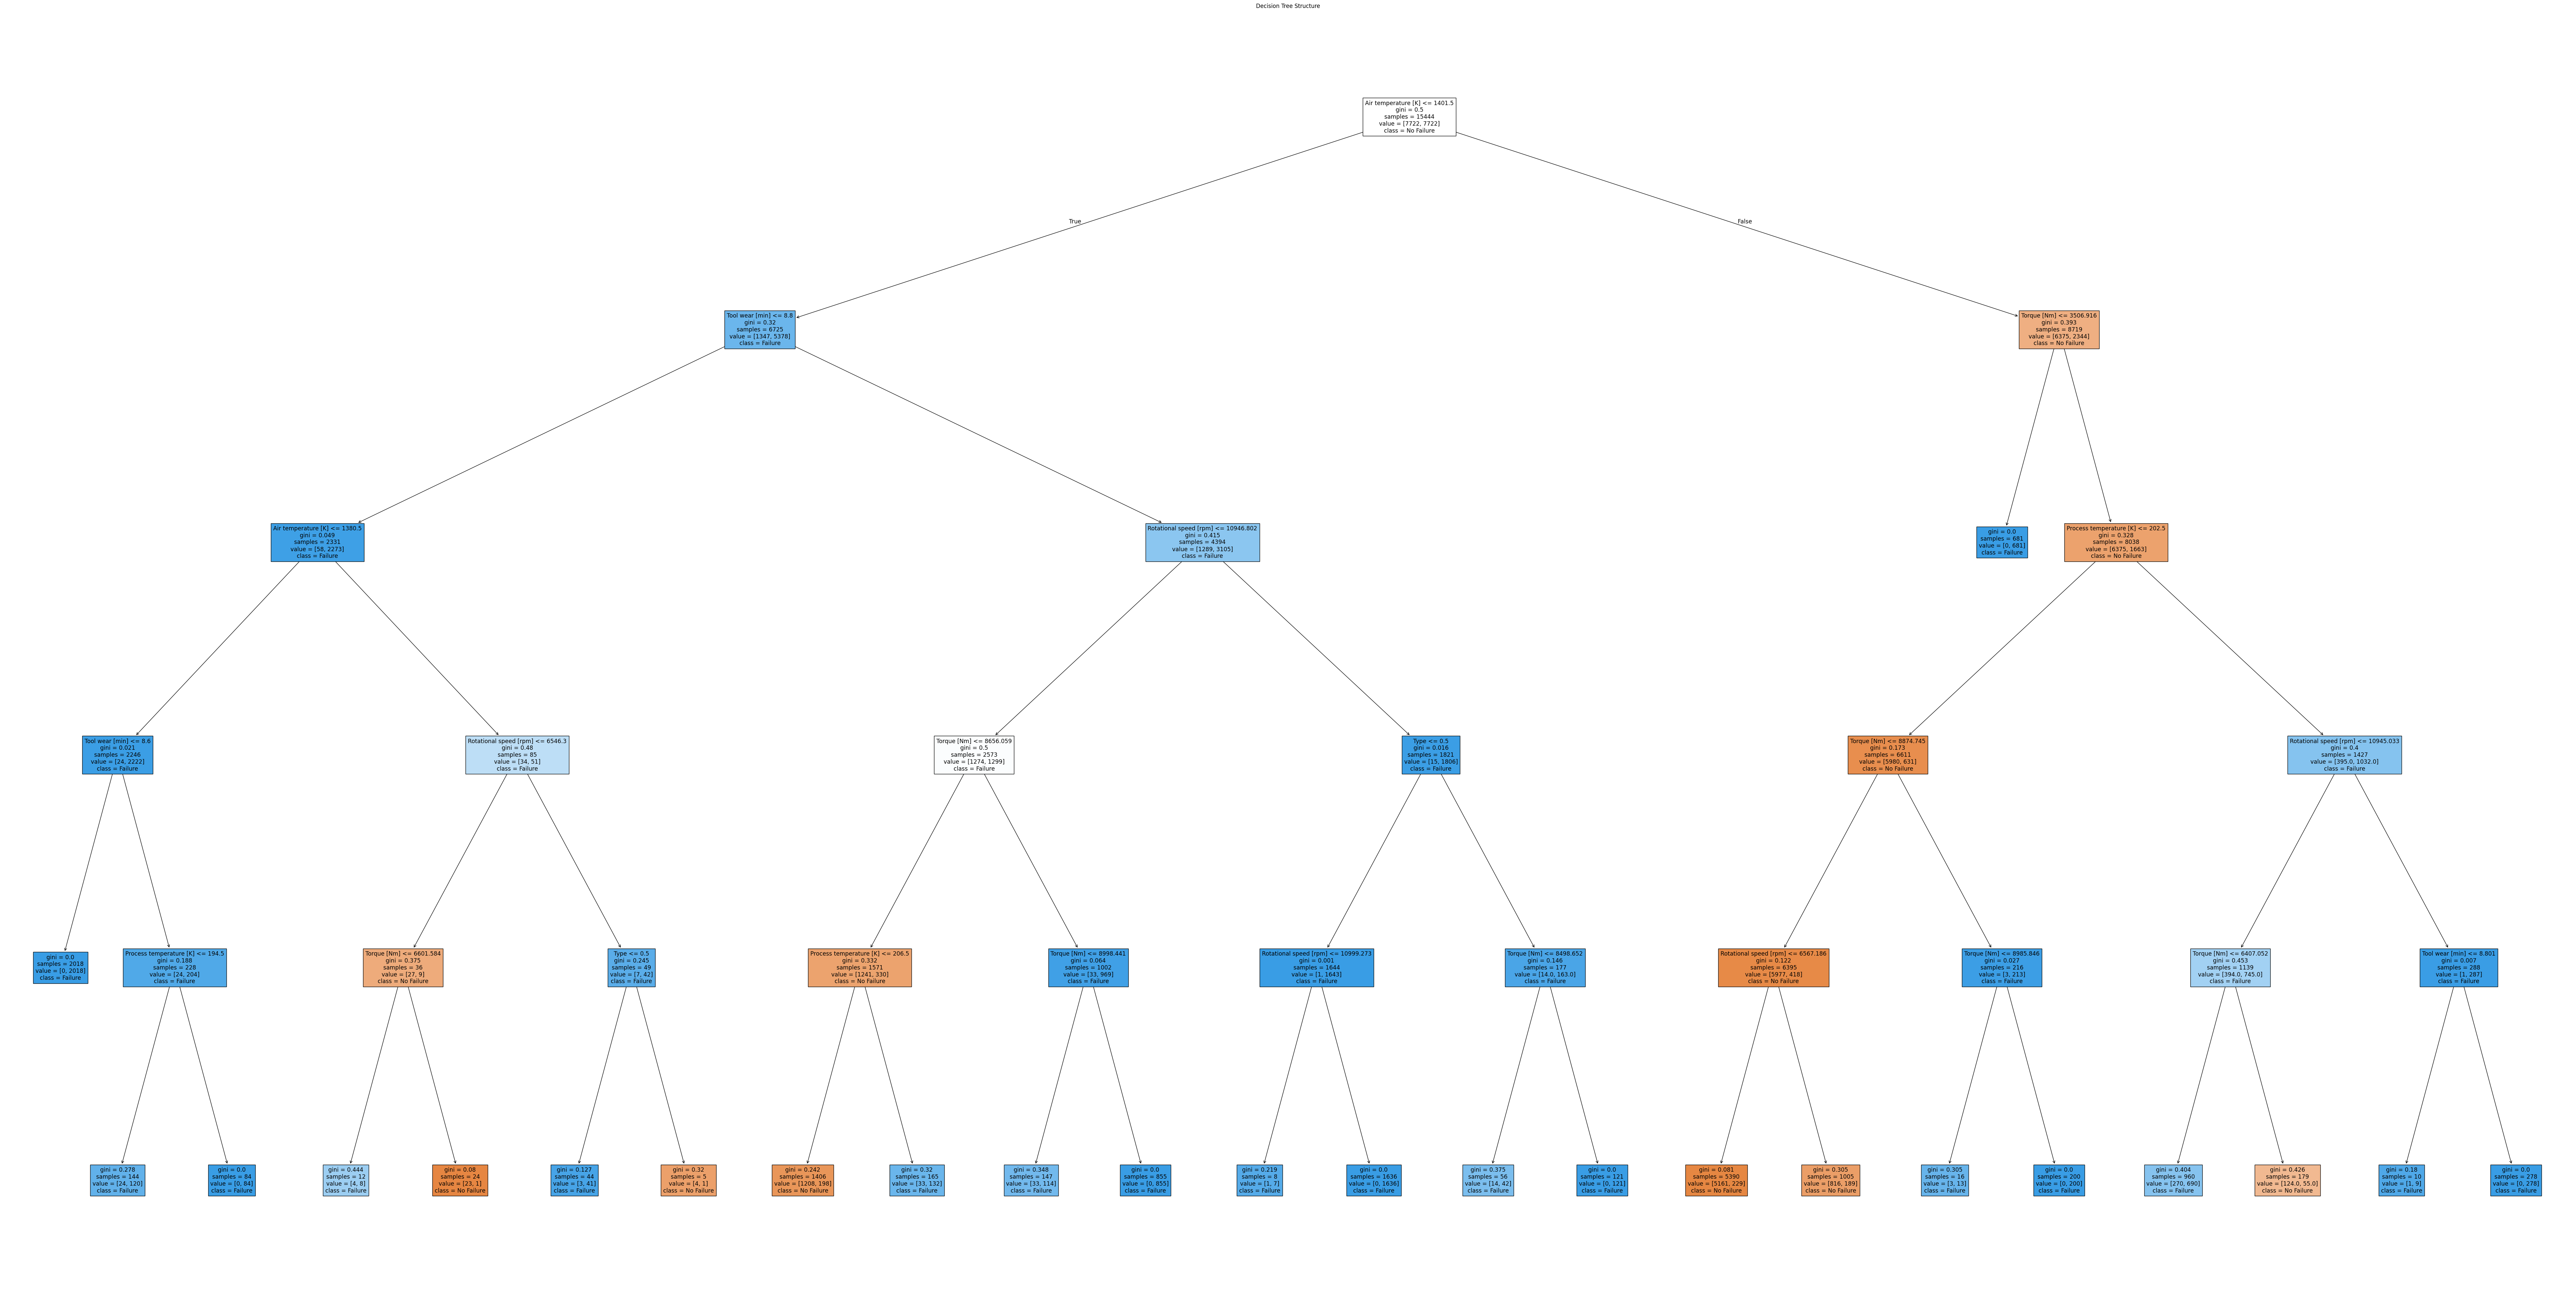

In [27]:
from sklearn import tree
plt.figure(figsize=(100, 50))
tree.plot_tree(cdt, filled=True, feature_names=X_train.columns, class_names=['No Failure', 'Failure'])
plt.title('Decision Tree Structure')
plt.show()

# Multi-label Classifier